# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

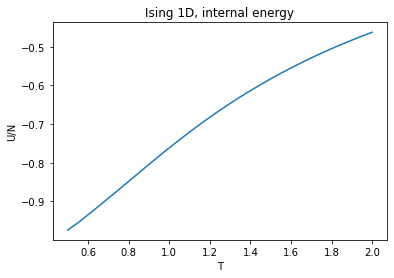

In [1]:
import numpy as np
import matplotlib.pyplot as plt
points=31
T = np.linspace(0.5,2.0,num=points)
#T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

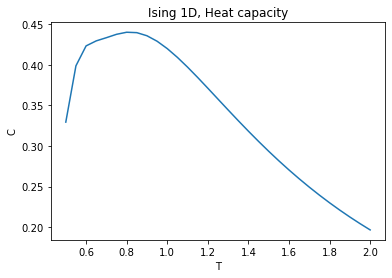

In [2]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $ M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0 $ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

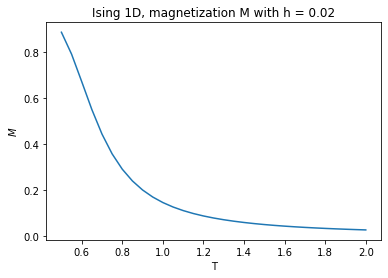

In [3]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

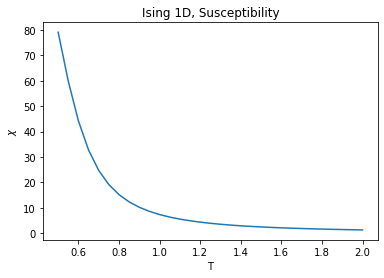

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

### Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import numpy as np
import math

In [6]:
def equilibration_plot(v1,v2,v3,y_label,quantità,pos_legend):
    fig, ax = plt.subplots(figsize=(12,5),tight_layout=True)
    ax.set_title('\n Equilibrazione del sistema partendo da tre configurazioni di spin differenti analizzando '+quantità,color='C0',fontsize=15)
    plt.ylabel(y_label+'\n')
    plt.xlabel('# steps \n')
    ax.plot(v1,'-k',label='spin random')
    ax.plot(v2,label='spin down')
    ax.plot(v3, label='spin up')
    legend = ax.legend(loc=pos_legend+' right', shadow=False, fontsize='x-large')
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    
    plt.grid(alpha=0.4)
    plt.show()

### <font face = "Tahoma" style="color:teal"><b>Equilibrazione del sistema per $T=0.5$ e $h=0$</b></font>
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Il codice usato per equilibrare il sistema è situato nella cartella <font face="Courier">/Lecture06/Equilibrazione</font>.

Genero un processo di equilibrazione utile a capire in quanto tempo il sistema si equilibra e su quale configurazione si equilibra a $T=0.5$. <br>
Faccio 3 simulazioni da 500 steps partendo da 3 configurazioni iniziali differenti:
- configurazione random
- spin tutti down
- spin tutti up

e plotto l'energia per particella ad ogni step.

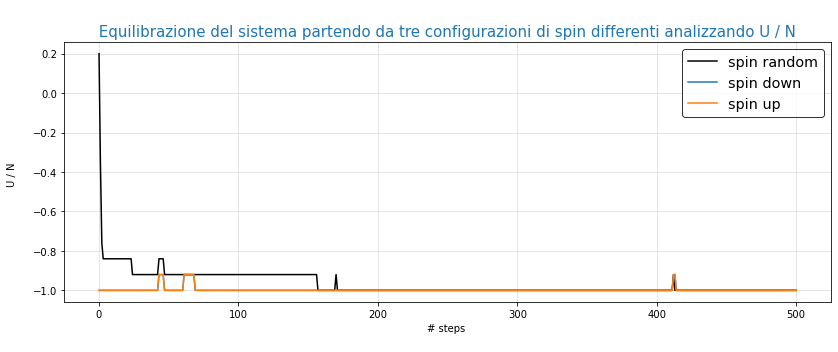

In [7]:
en_r = np.loadtxt(fname='Lecture06/Equilibration_T0.5_h0/Random/output_ene_random.0')
en_d = np.loadtxt(fname='Lecture06/Equilibration_T0.5_h0/Down/output_ene_down.0')
en_u = np.loadtxt(fname='Lecture06/Equilibration_T0.5_h0/Up/output_ene_up.0')

equilibration_plot(en_r,en_d,en_u,'U / N ','U / N ','upper')

Dopo 270 steps l'energia di tutte e tre le simulazioni converge a -1.
Mentre le configurazioni finali dopo 500 steps sono cambiate in questo modo:
- la simulazione che aveva configurazione iniziale random termina con configurazione finale con spin tutti down
- la simulazione che aveva configurazione iniziale con spin tutti down termina con spin tutti down
- la simulazione che aveva configurazione iniziale con spin tutti up termina con spin tutti up

Per la simulazione a $h=0$ e $T=0.5$ decido di prendere come configurazione iniziale quella costituita da spin tutti down.

## <font face = "Tahoma" style="color:teal"><b>Simulazioni:</b></font>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Il codice usato per simulare il sistema è situato nella cartella <font face="Courier">/Lecture06/ISING_1D</font>.
    </p>
    <p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Ho creato uno script in bash (<font face="Courier">Simulazione.sh</font>) che si occupa di avviare consecutivamente 31 simulazioni, una per ogni temperatura scelta: la prima simulazione avviene a $T=0.5$ e le simulazioni successive avvengono a una $T$ di $\Delta T=0.05$ più grande della precedente. Ogni simulazione prende come configurazione iniziale del reticolo la configurazione finale della simulazione precedente; prima di iniziare la simulazione monte carlo a blocchi, avviene un ciclo di $300$ steps di equilibrazione del sistema.<br>
    Ho storato per ogni simulazione i file che riportano ad ogni blocco i dati delle medie progressive di <i>$\frac{U}{N}$, $C$, $\chi$ e $M$</i> e le rispettive incertezze. Inoltre con il metodo <i>append</i> stampo per ogni simulazione i valori all'ultimo blocco di $\frac{U}{N}(T)$, $C(T)$, $\chi(T)$ e $M(T)$, con le rispettive incertezze statistiche.
    </p>

### <font face = "Tahoma" style="color:teal"><b>Simulazioni ad $h=0$ al variare di $T\in[0.5,1.5]$ </b></font>

In [8]:
def graphic(x,y,err,y2,err2,ystring,title,y_an):
    fig, ax = plt.subplots(figsize=(12,5),tight_layout=True)
    ax.errorbar(x,y,yerr=err,label='metropolis')
    ax.fill_between(x, y - err, y + err, alpha=0.1,color='blue')
    ax.errorbar(x,y2,yerr=err2,label='gibbs')
    ax.fill_between(x, y2 - err2, y2 + err2, alpha=0.1,color='orange')
    ax.plot(x,y_an,'k--',linewidth=0.8,label='analitic curve')
    plt.xlabel('$T$')
    plt.ylabel(ystring)
    plt.title('\n'+title+'\n\n',color='C0',fontsize=15)
    legend = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.,fontsize='x-large')
    plt.grid(alpha=0.4)
    plt.show()

def ZoomPlot(x,y,err,y2,err2,ystring,title,y_an,T_init):
    fig, ax = plt.subplots(figsize=(8,7),tight_layout=True)
    
    X=np.zeros(4)
    y_z=np.zeros(4)
    err_z=np.zeros(4)
    y2_z=np.zeros(4)
    err2_z=np.zeros(4)
    y_an_z=np.zeros(4)
    
    for i in range(4):
        X[i]=x[i+T_init]
        y_z[i]=y[i+T_init]
        err_z[i]=err[i+T_init]
        y2_z[i]=y2[i+T_init]
        err2_z[i]=err2[i+T_init]
        y_an_z[i]=y_an[i+T_init]
        
    ax.errorbar(X,y_z,yerr=err_z,label='metropolis')
    ax.fill_between(X, y_z - err_z, y_z + err_z, alpha=0.15,color='blue')
    ax.errorbar(X,y2_z,yerr=err2_z,label='gibbs')
    ax.fill_between(X, y2_z - err2_z, y2_z + err2_z, alpha=0.2,color='orange')
    ax.plot(X,y_an_z,'k--',linewidth=0.8,label='analitic curve')
    plt.xlabel('$T$')
    plt.ylabel(ystring)
    plt.title('\n'+title+'\nZoom a part of the graph to display the error bars\n\n',color='C0',fontsize=15)
    legend = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.,fontsize='x-large')
    plt.grid(alpha=0.4)
    plt.show()
    

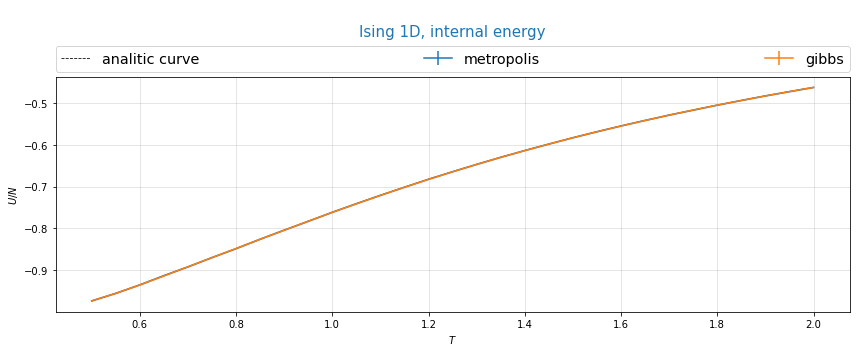

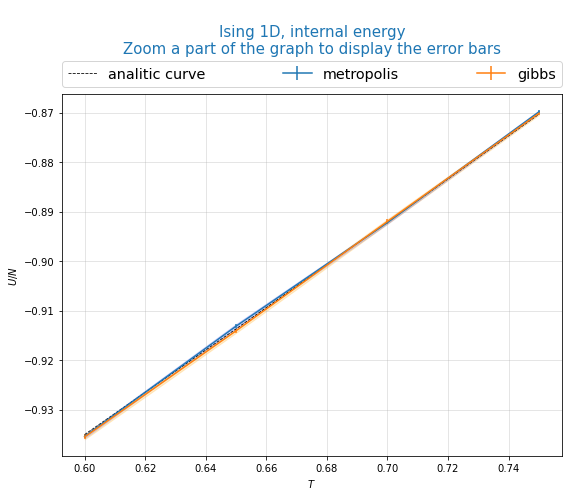

In [9]:
T = np.linspace(0.5,2.0,num=31)
u = np.loadtxt(fname='Lecture06/Simulazione_h0_Metro/final_ene_T.dat',usecols=1)
error_u = np.loadtxt(fname='Lecture06/Simulazione_h0_Metro/final_ene_T.dat',usecols=2)
ug = np.loadtxt(fname='Lecture06/Simulazione_h0_Gibbs/final_ene_T.dat',usecols=1)
error_ug = np.loadtxt(fname='Lecture06/Simulazione_h0_Gibbs/final_ene_T.dat',usecols=2)
graphic(T,u,error_u,ug,error_ug,'$U / N$','Ising 1D, internal energy',e)
ZoomPlot(T,u,error_u,ug,error_ug,'$U / N$','Ising 1D, internal energy',e,2)

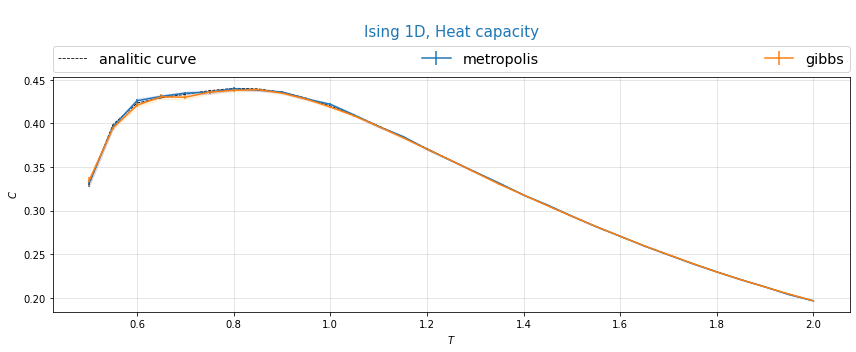

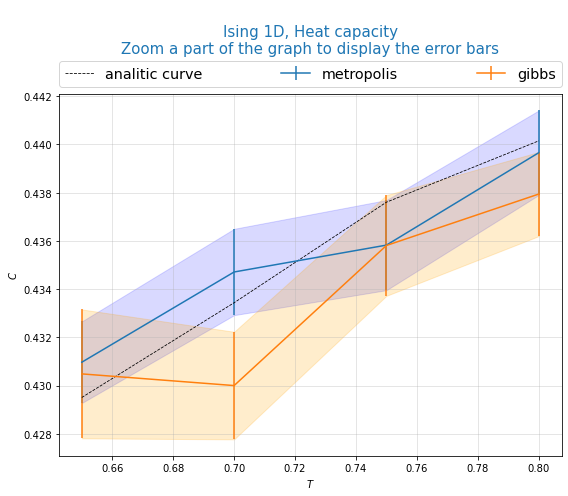

In [10]:
T = np.linspace(0.5,2.0,num=31)
h = np.loadtxt(fname='Lecture06/Simulazione_h0_Metro/final_heat_T.dat',usecols=1)
error_h = np.loadtxt(fname='Lecture06/Simulazione_h0_Metro/final_heat_T.dat',usecols=2)
hg = np.loadtxt(fname='Lecture06/Simulazione_h0_Gibbs/final_heat_T.dat',usecols=1)
error_hg = np.loadtxt(fname='Lecture06/Simulazione_h0_Gibbs/final_heat_T.dat',usecols=2)
graphic(T,h,error_h,hg,error_hg,'$C$','Ising 1D, Heat capacity',heat)
ZoomPlot(T,h,error_h,hg,error_hg,'$C$','Ising 1D, Heat capacity',heat,3)

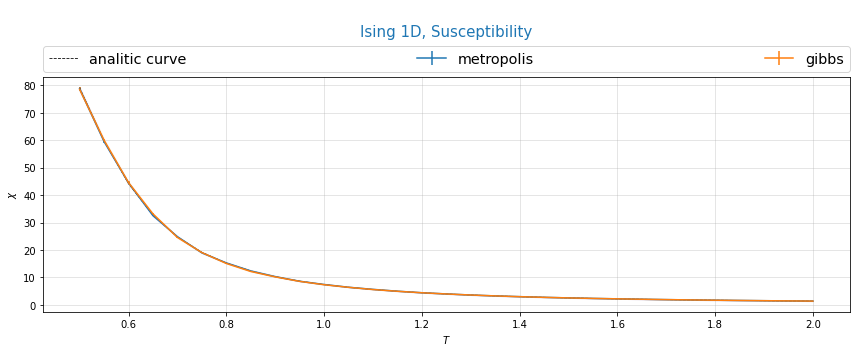

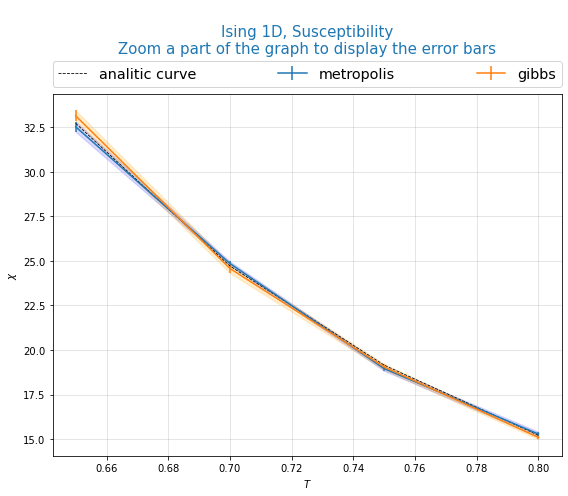

In [11]:
T = np.linspace(0.5,2.0,num=31)
ch = np.loadtxt(fname='Lecture06/Simulazione_h0_Metro/final_chi_T.dat',usecols=1)
error_ch = np.loadtxt(fname='Lecture06/Simulazione_h0_Metro/final_chi_T.dat',usecols=2)
chg = np.loadtxt(fname='Lecture06/Simulazione_h0_Gibbs/final_chi_T.dat',usecols=1)
error_chg = np.loadtxt(fname='Lecture06/Simulazione_h0_Gibbs/final_chi_T.dat',usecols=2)
graphic(T,ch,error_ch,chg,error_chg,'$\chi$','Ising 1D, Susceptibility',X)
ZoomPlot(T,ch,error_ch,chg,error_chg,'$\chi$','Ising 1D, Susceptibility',X,3)

### <font face = "Tahoma" style="color:teal"><b>Equilibrazione del sistema per $T=0.5$ e $h=0.02$</b></font>

Faccio 3 simulazioni da 1000 steps partendo da 3 configurazioni iniziali differenti:
- configurazione random
- spin tutti down
- spin tutti up

e plotto l'energia per particella e la magnetizzazione del sistema ad ogni step.

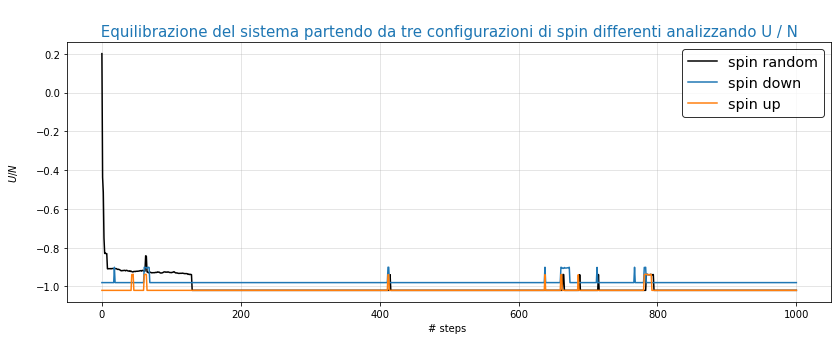

In [12]:
ene_r = np.loadtxt(fname='Lecture06/Equilibration_T0.5_h0.02/Random/output_ene_random.0')
ene_d = np.loadtxt(fname='Lecture06/Equilibration_T0.5_h0.02/Down/output_ene_down.0')
ene_u = np.loadtxt(fname='Lecture06/Equilibration_T0.5_h0.02/Up/output_ene_up.0')

equilibration_plot(ene_r,ene_d,ene_u,'$U / N$','U / N ','upper')

Dopo circa 170 steps l'energia per particella delle prime due simulazioni si assesta sul valore $-1.02$, mentre quella per la simulazione della configurazione con tutti spin up si assesta sul valore $-0.98$.

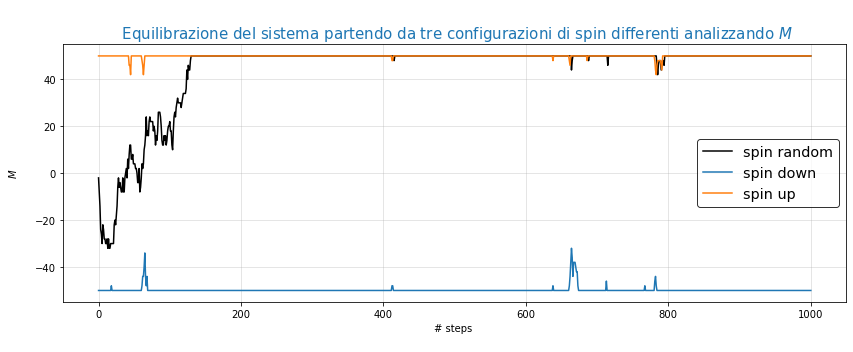

In [13]:
mag_r = np.loadtxt(fname='Lecture06/Equilibration_T0.5_h0.02/Random/output_mag_random.0')
mag_d = np.loadtxt(fname='Lecture06/Equilibration_T0.5_h0.02/Down/output_mag_down.0')
mag_u = np.loadtxt(fname='Lecture06/Equilibration_T0.5_h0.02/Up/output_mag_up.0')

equilibration_plot(mag_r,mag_d,mag_u,'$M$ ','$M$ ','center')

Per quanto riguarda la magnetizzazione del sistema, sempre dopo circa 170 steps anch'essa si assesta in tutte e tre le simulazioni. La simulazione che iniziava con configurazione di tutti spin down mantiene per quasi tutta la simulazione magnetizzazione pari a $-50$, mentre le altre due si assestano su $+50$.

Le configurazioni finali dopo 1000 steps sono cambiate in questo modo:
- la simulazione che aveva configurazione iniziale random termina con configurazione finale con spin tutti up
- la simulazione che aveva configurazione iniziale con spin tutti down termina con spin tutti down, la quale presenta un'energia maggiore rispetto alle altre due configurazioni
- la simulazione che aveva configurazione iniziale con spin tutti up termina con spin tutti up

Per la simulazione ad $h=0.02$ e $T=0.5$ decido di prendere come configurazione iniziale quella costituita da spin tutti up.

### <font face = "Tahoma" style="color:teal"><b>Simulazioni ad $h=0.02$ al variare di $T\in[0.5,1.5]$ </b></font>

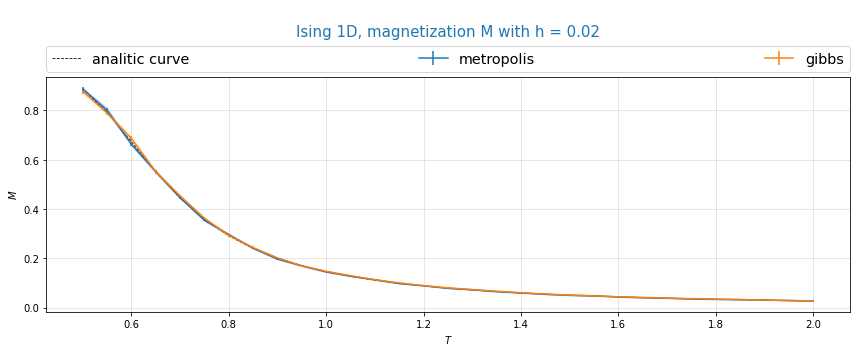

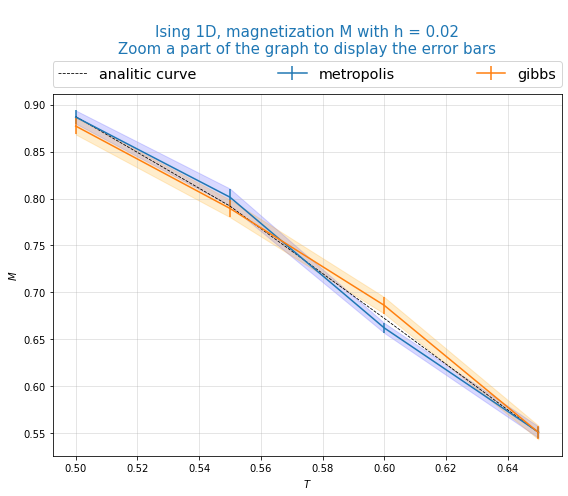

In [14]:
T = np.linspace(0.5,2.0,num=31)
m = np.loadtxt(fname='Lecture06/Simulazione_h0.02_Metro/final_mag_T.dat',usecols=1)
error_m = np.loadtxt(fname='Lecture06/Simulazione_h0.02_Metro/final_mag_T.dat',usecols=2)
mg = np.loadtxt(fname='Lecture06/Simulazione_h0.02_Gibbs/final_mag_T.dat',usecols=1)
error_mg = np.loadtxt(fname='Lecture06/Simulazione_h0.02_Gibbs/final_mag_T.dat',usecols=2)
graphic(T,m,error_m,mg,error_mg,'$M$','Ising 1D, magnetization M with h = 0.02',M)
ZoomPlot(T,m,error_m,mg,error_mg,'$M$','Ising 1D, magnetization M with h = 0.02',M,0)